# Caffeinated Rest

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import networkx as nx

## Load data

In [3]:
from load_data import load_scrubbed

# load some data
data = load_scrubbed(n_sessions=3)

INFO:load_data:load_scrubbed(**{'n_sessions': 3})
INFO:load_data:Loading data...
INFO:root:  [+] session: 1, path: data/base/combined_data_scrubbed/sub014.txt
INFO:root:  [+] session: 2, path: data/base/combined_data_scrubbed/sub015.txt
INFO:root:  [+] session: 3, path: data/base/combined_data_scrubbed/sub016.txt


In [4]:
# print some info
for attr in ['data', 'meta', 'X', 'y']:
    print("data.{:8s} = {}\t{}".format(
        attr, np.shape(dict(data)[attr]), type(dict(data)[attr])
    ))

data.data     = (1554, 630)	<class 'pandas.core.frame.DataFrame'>
data.meta     = (1554, 3)	<class 'pandas.core.frame.DataFrame'>
data.X        = (1554, 630)	<class 'numpy.ndarray'>
data.y        = (1554, 3)	<class 'numpy.ndarray'>


### Scatter plots of data

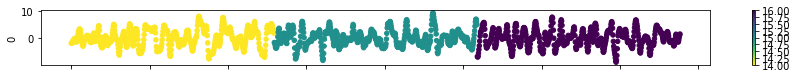

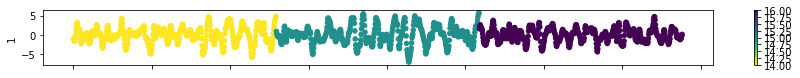

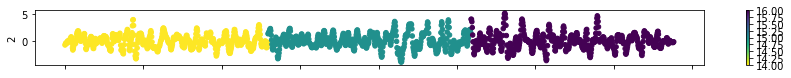

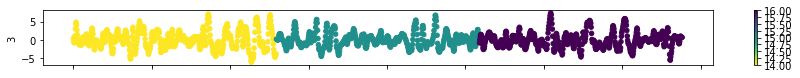

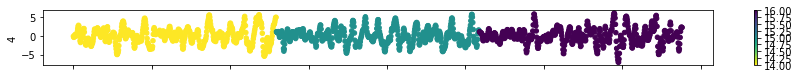

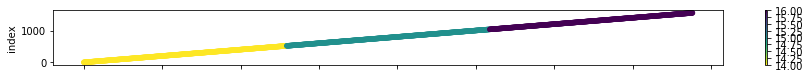

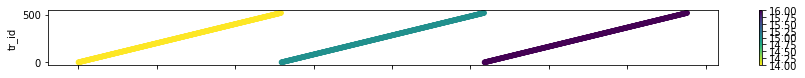

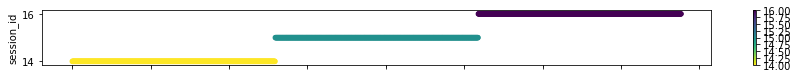

In [5]:
# plot all timeseries, over 5 ROIs, over all sessions
subset = data.data.iloc[:, :5].assign(index = data.data.index)
subset = subset.join(data.meta).set_index('session')
for col in subset.columns:
    ax = subset.plot(
        kind='scatter', 
        x='index', y=col,
        c=data.meta.session_id.values, 
        subplots=True, 
        figsize=(15,1),
        cmap='viridis_r'
    )
    ax[0].set_ylabel(col)

## Run $MAPPER$ 

In [17]:
from kmapper import KeplerMapper, Cover
from kmapper.jupyter import display
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from hdbscan import HDBSCAN 

In [7]:
# init mapper
mapper = KeplerMapper(verbose=0)

In [8]:
# init data to map
X = data.data.values
y = data.meta['session_id'].values

In [9]:
# [1] Fit low-dimensional embedding (lens)
lens = mapper.fit_transform(
    data.X, 
    projection=TSNE(perplexity=50, init='pca', random_state=0)
    )

In [10]:
# [2] Map simplicial complex (graph)
graph = mapper.map(
    lens, data.X, 
    clusterer=HDBSCAN(min_cluster_size=10, allow_single_cluster=True),
    cover=Cover(20, 0.67)
    )

In [11]:
# [3] Visualzie mapper graph
html = mapper.visualize(graph)
display('mapper_visualization_output.html')

### Color by "session_id"

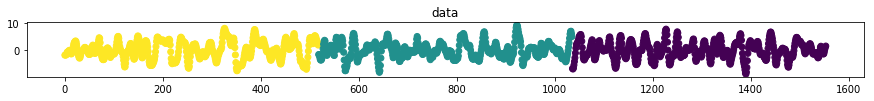

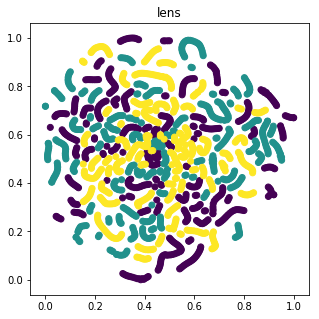

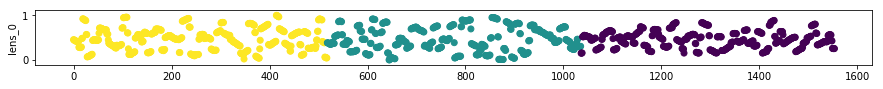

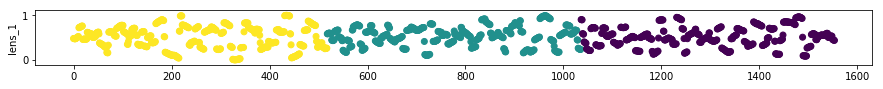

In [12]:
# [0] define meta to color by
y = data.meta['session_id'].values 


# [1] visualize data
plt.figure(figsize=(15,1))
plt.scatter(np.arange(len(X)), X.T[0], c=y, cmap='viridis_r')
plt.title('data')
plt.show()


# [2] visualize lens
plt.figure(figsize=(5,5))
plt.scatter(*lens.T, c=y)
plt.title('lens')
for di, lens_di in enumerate(lens.T):
    plt.figure(figsize=(15,1))
    plt.scatter(np.arange(len(lens)), lens_di, c=y, cmap='viridis_r')
    plt.ylabel('lens_{}'.format(di))
plt.show()


# [3] Visualzie mapper graph
html = mapper.visualize(graph, color_function=y)
display('mapper_visualization_output.html')

### Color by "tr_id"

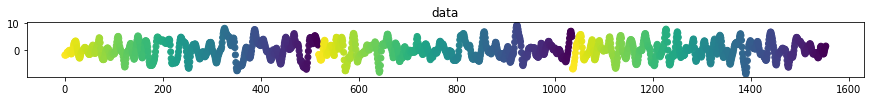

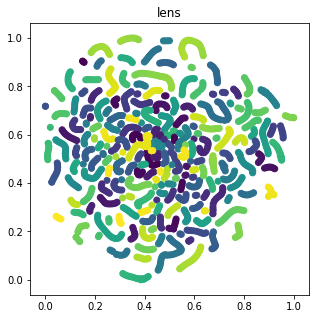

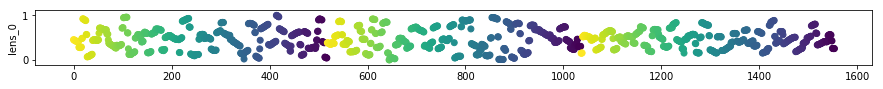

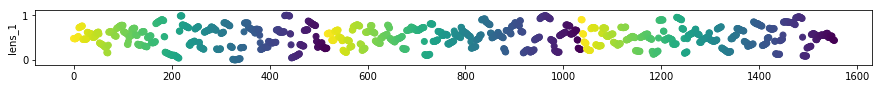

In [13]:
# [0] define meta to color by
y = data.meta['tr_id'].values 


# [1] visualize data
plt.figure(figsize=(15,1))
plt.scatter(np.arange(len(X)), X.T[0], c=y, cmap='viridis_r')
plt.title('data')
plt.show()


# [2] visualize lens
plt.figure(figsize=(5,5))
plt.scatter(*lens.T, c=y)
plt.title('lens')
for di, lens_di in enumerate(lens.T):
    plt.figure(figsize=(15,1))
    plt.scatter(np.arange(len(lens)), lens_di, c=y, cmap='viridis_r')
    plt.ylabel('lens_{}'.format(di))
plt.show()


# [3] Visualzie mapper graph
html = mapper.visualize(graph, color_function=y)
display('mapper_visualization_output.html')

### Color by "lens_0"

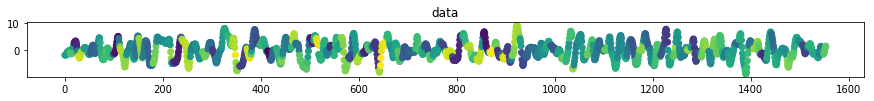

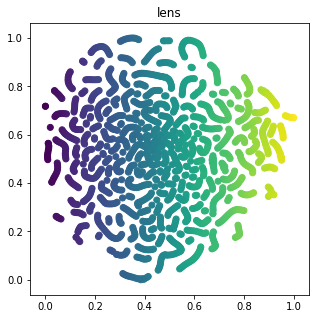

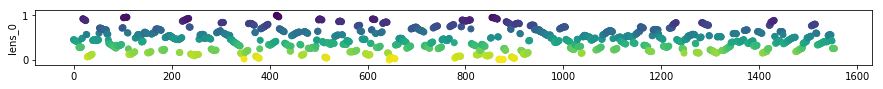

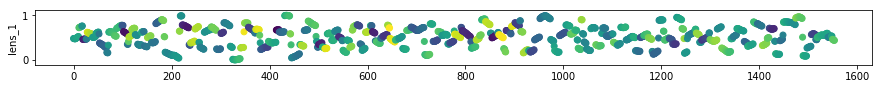

In [14]:
# [0] define meta to color by
y = lens.T[0]


# [1] visualize data
plt.figure(figsize=(15,1))
plt.scatter(np.arange(len(X)), X.T[0], c=y, cmap='viridis_r')
plt.title('data')
plt.show()


# [2] visualize lens
plt.figure(figsize=(5,5))
plt.scatter(*lens.T, c=y)
plt.title('lens')
for di, lens_di in enumerate(lens.T):
    plt.figure(figsize=(15,1))
    plt.scatter(np.arange(len(lens)), lens_di, c=y, cmap='viridis_r')
    plt.ylabel('lens_{}'.format(di))
plt.show()


# [3] Visualzie mapper graph
html = mapper.visualize(graph, color_function=y)
display('mapper_visualization_output.html')

### Color by "lens_1"

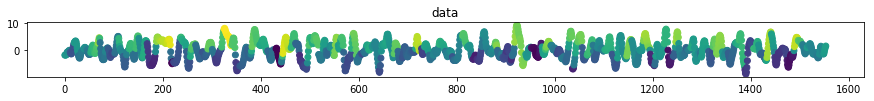

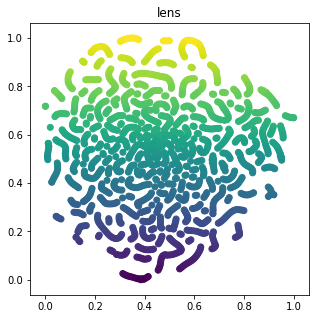

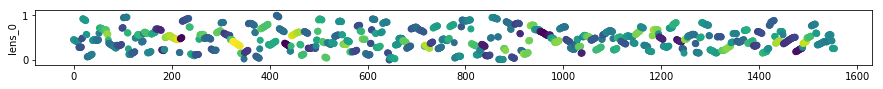

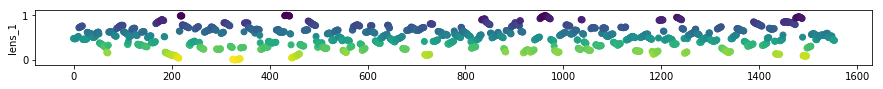

In [15]:
# [0] define meta to color by
y = lens.T[1]


# [1] visualize data
plt.figure(figsize=(15,1))
plt.scatter(np.arange(len(X)), X.T[0], c=y, cmap='viridis_r')
plt.title('data')
plt.show()


# [2] visualize lens
plt.figure(figsize=(5,5))
plt.scatter(*lens.T, c=y)
plt.title('lens')
for di, lens_di in enumerate(lens.T):
    plt.figure(figsize=(15,1))
    plt.scatter(np.arange(len(lens)), lens_di, c=y, cmap='viridis_r')
    plt.ylabel('lens_{}'.format(di))
plt.show()


# [3] Visualzie mapper graph
html = mapper.visualize(graph, color_function=y)
display('mapper_visualization_output.html')

## Convert $MAPPER$ graph to `nx.Graph`

In [41]:
import networkx as nx
from collections import Counter

In [42]:
# init Graph with links, add nodes
G = nx.Graph(graph['links'])
G.add_nodes_from(graph['nodes'].keys())

# add members to Graph nodes
nx.set_node_attributes(G, dict(graph['nodes']), 'members')

# show some info
print('# nodes: {}'.format(G.number_of_nodes()))
print('# edges: {}'.format(G.number_of_edges()))

# nodes: 233
# edges: 563


### Vizualize `nx.Graph`

In [58]:
# size by number of members
node_size = [1 * len(G.nodes[n]['members'])**2 for n in G]

In [43]:
# color nodes by mode
y = data.meta['session_id'].values
node_color=[Counter(y[_]).most_common()[0][0] for n,_ in G.nodes('members')]

In [89]:
# shells by color (?)
shells = [[n for n,_ in zip(G, node_color) if _==__] for __ in set(node_color)]

In [90]:
# layouts
layouts = dict()
layouts['spring'] = nx.spring_layout(G)
layouts['kamada_kawai'] = nx.kamada_kawai_layout(G)
layouts['circular'] = nx.circular_layout(G)
layouts['shell'] = nx.shell_layout(G, shells)

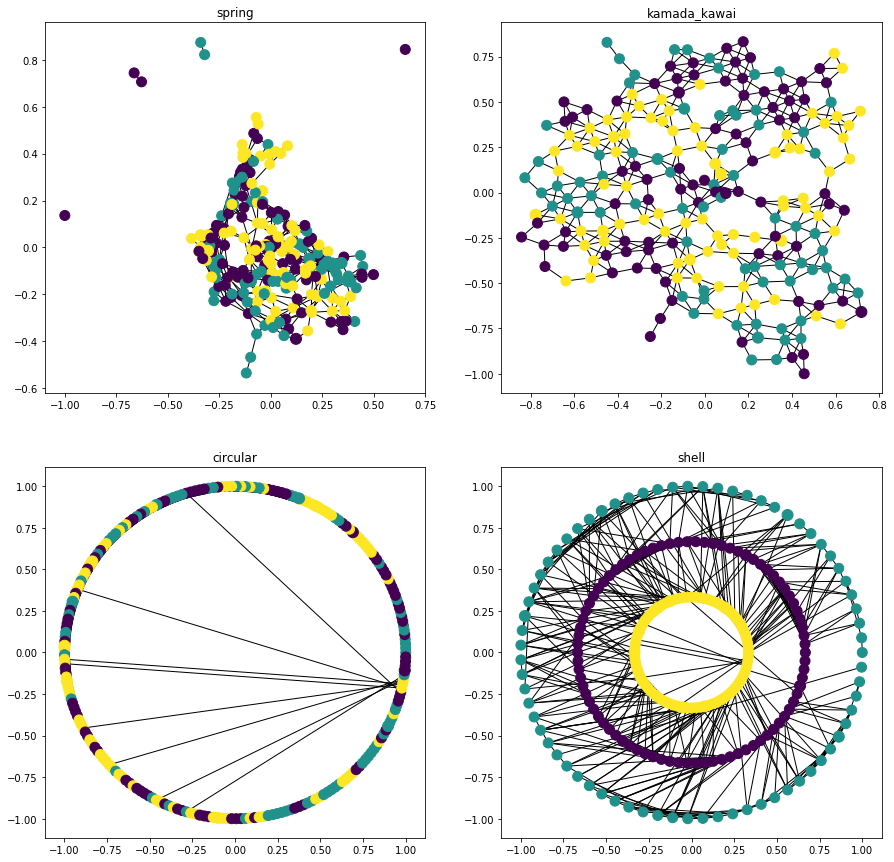

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
axes = np.ravel(axes)

for i,k in enumerate(layouts):
    _ = nx.draw_networkx(
        G, pos=layouts[k],
        node_color=node_color,
        node_size=node_size,
        with_labels=False, 
        ax=axes[i]
    )
    axes[i].set_title(k)

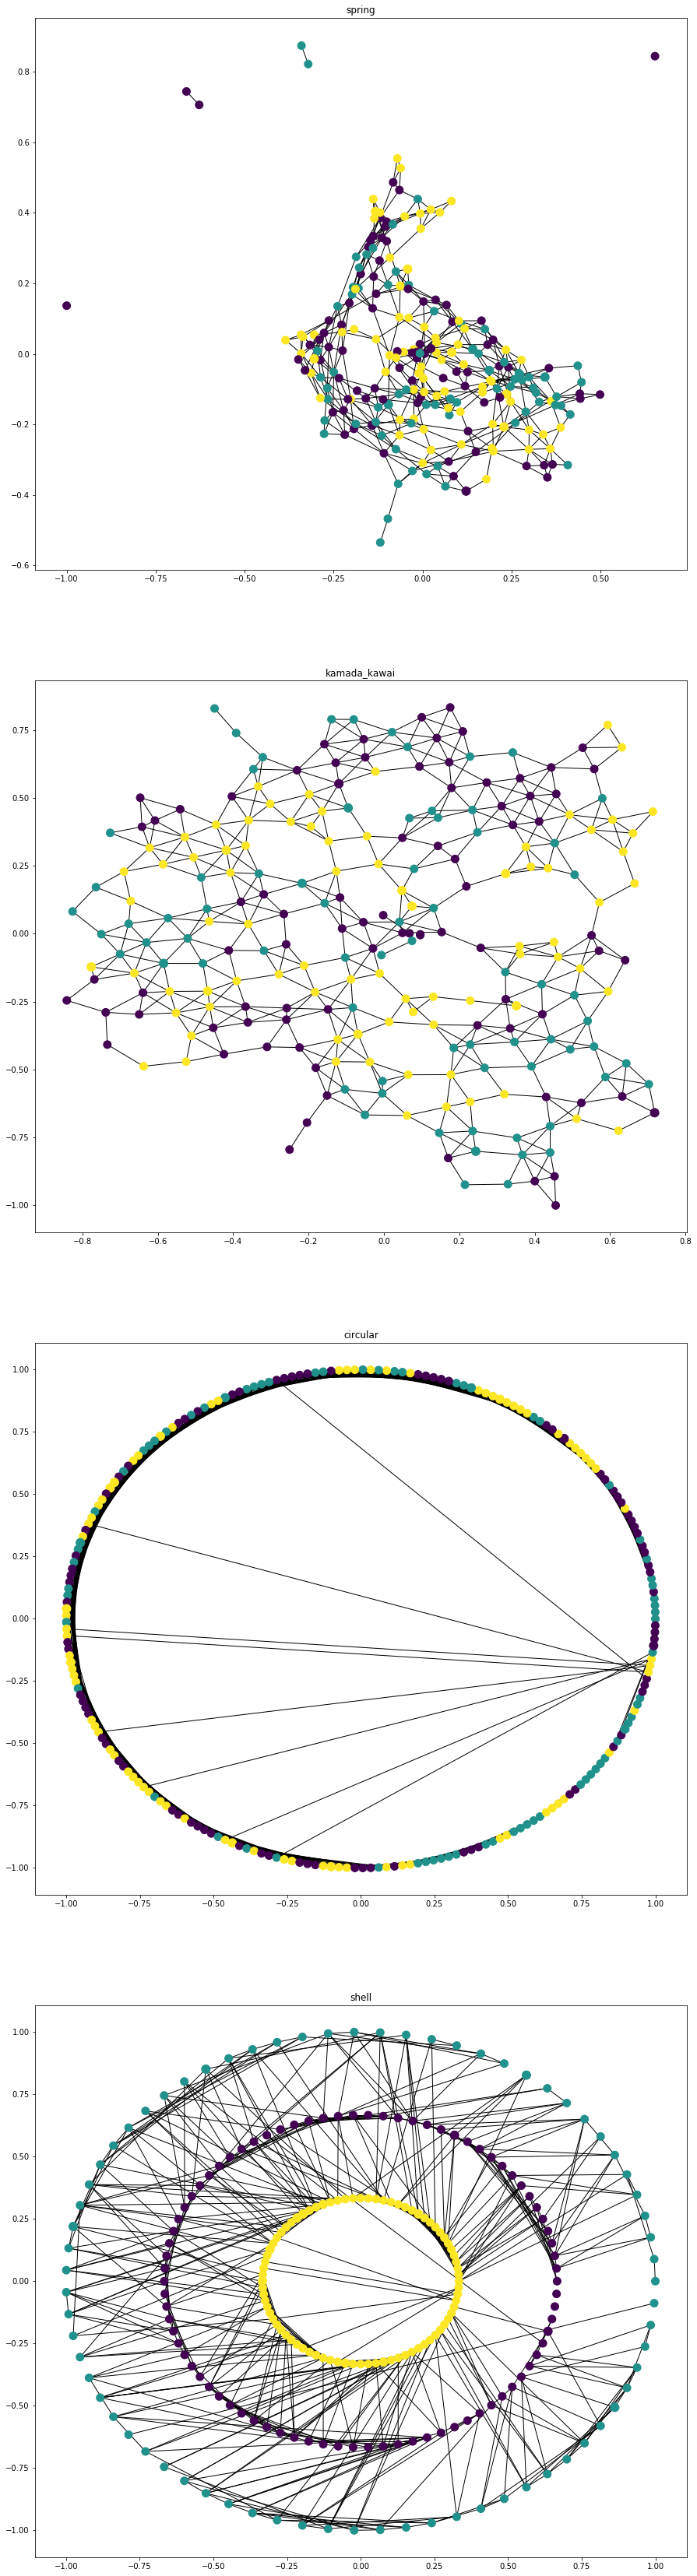

In [92]:
fig, axes = plt.subplots(len(layouts), 1, figsize=(15,len(layouts)*15))
axes = np.ravel(axes)

for i,k in enumerate(layouts):
    _ = nx.draw_networkx(
        G, pos=layouts[k],
        node_color=node_color,
        node_size=node_size,
        with_labels=False, 
        ax=axes[i]
    )
    axes[i].set_title(k)